In [1]:
base_dir='DataSet/dataset'
train_dir=os.path.join(base_dir,'training_set')
test_dir=os.path.join(base_dir,'test_set')

In [2]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
print("Cat Train : ",len(os.listdir(train_cats_dir)),"\nDog Train : ",len(os.listdir(train_dogs_dir)))

Cat Train :  4000 
Dog Train :  4000


In [3]:
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')
print("Cat test : ",len(os.listdir(test_cats_dir)),"\nDog Test : ",len(os.listdir(test_dogs_dir)))

Cat test :  1000 
Dog Test :  1000


In [4]:
import keras
from keras import layers
from keras import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [5]:
img_input = layers.Input(shape=(150,150,3))
x = layers.Conv2D(16,3,activation='relu')(img_input)
x = layers.MaxPool2D(2)(x)

In [6]:
x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.MaxPool2D(2)(x)

In [7]:
x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPool2D(2)(x)

In [8]:
x = layers.Flatten()(x)

In [9]:
x = layers.Dense(512,activation='relu')(x)
x= layers.Dropout(0.2)(x)

In [10]:
output = layers.Dense(1,activation='sigmoid')(x)

In [11]:
cnn_model = Model(img_input,output)

In [12]:
cnn_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

In [13]:
from keras.optimizers import RMSprop

In [14]:
cnn_model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [16]:
history = cnn_model.fit_generator(
    train_generator,
    steps_per_epoch=400 ,#8000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps = 100 #2000 images = batch_size * steps
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
400/400 [==============================] - ETA: 0s - loss: 0.6343 - accuracy: 0.6294WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019485ACC400> and will run it as-is.
Please report this to the TensorFlow team. When filing

In [32]:
import random
rand_digit = random.randint(0,100)
rand_digit

62

In [36]:
path = 'model/cnnflow'+str(rand_digit)+'.pb'
cnn_model.save(path)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: model/cnnflow62.pb\assets


In [18]:
from keras.models import model_from_json
# serialize model to JSON
model_json = cnn_model.to_json()
with open("model/cnnflow.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn_model.save_weights("model/cnnflow.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
from keras.preprocessing import image
import numpy as np
input_img = ['cat.jpg','cat2.jpg','cat3.jpg','dog.jpg','dog.jpg','dog.jpg']
dir_smaple = 'DataSet/dataset/single_prediction'
test_image =image.load_img('DataSet/dataset/single_prediction/cat.jpg',target_size=(150,150))
test_image=image.img_to_array(test_image) 
test_image= np.expand_dims(test_image,axis=0)


In [20]:
result = cnn_model.predict(test_image)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [21]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [22]:
result

array([[0.]], dtype=float32)

In [23]:
if result[0][0] == 1:
  print('dog')
else:
  print('cat')

cat


In [26]:
input_imgs = ['cat.jpg','cat2.jpg','cat3.jpg','dog.jpg','dog.jpg','dog.jpg','cat4.jpg','cat5.jpg','cat6.jpg','cat7.jpg','cat8.jpg',]
dir_smaple = 'DataSet/dataset/single_prediction'
for i in input_imgs:
    test_image =image.load_img(os.path.join(dir_smaple,i),target_size=(150,150))
    test_image=image.img_to_array(test_image) 
    test_image= np.expand_dims(test_image,axis=0)
    result = cnn_model.predict(test_image)
    print(i ,end=" ")
    if result[0][0] == 1:
        print('dog')
    else:
        print('cat')


cat.jpg cat
cat2.jpg dog
cat3.jpg dog
dog.jpg dog
dog.jpg dog
dog.jpg dog
cat4.jpg cat
cat5.jpg cat
cat6.jpg cat
cat7.jpg dog
cat8.jpg cat


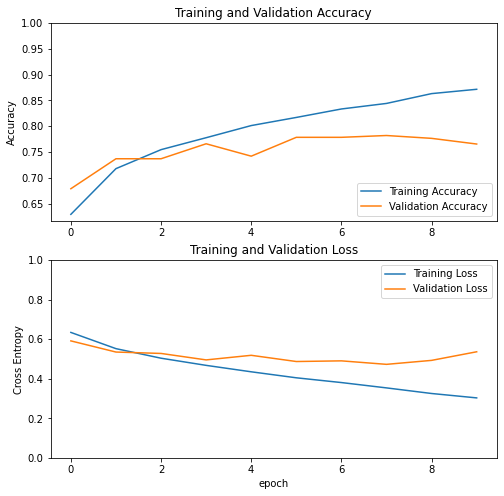

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()